In [ ]:
import h5py
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import matplotlib.cm as cm
from scipy.signal import savgol_filter
from scipy import stats

batch1 = pickle.load(open(r'D:\논문 준비\코드 복사\코드 복사\코드 복사\batch1.pkl', 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']

numBat1 = len(batch1.keys())

batch2 = pickle.load(open(r'D:\논문 준비\코드 복사\코드 복사\코드 복사\batch2.pkl','rb'))
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482];

for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]

del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']

numBat2 = len(batch2.keys())

batch3 = pickle.load(open(r'D:\논문 준비\코드 복사\코드 복사\코드 복사\batch3.pkl','rb'))
# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c38']
del batch3['b3c39']

numBat3 = len(batch3.keys())
numBat = numBat1 + numBat2 + numBat3
bat_dict = {**batch1, **batch2, **batch3}

In [2]:
sort=[]
for i in bat_dict.keys():
    a=len(bat_dict[i]['summary']['cycle'])+1
    sort.append([a,i])
    
# 색 조절.
sort=sorted(sort)
sort=np.array(sort)# cycle 순으로 정리 
sortcycle=sort[:,0].astype(float)
color=sortcycle/np.max(sortcycle)
chargecolor=cm.coolwarm(color)

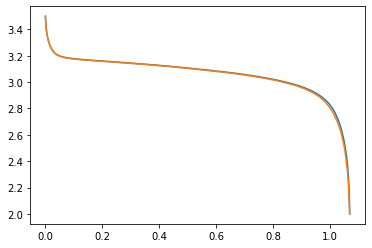

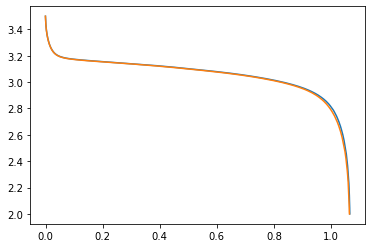

In [3]:
#선형보간된 방전용량.
for i,j in enumerate(sort[::-1,1,]):
    if i==2:
        break
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    plt.plot(Qdlin10,np.linspace(3.5,2.0,1000))
    plt.plot(Qdlin100,np.linspace(3.5,2.0,1000))
    plt.show()


6
7
9
22


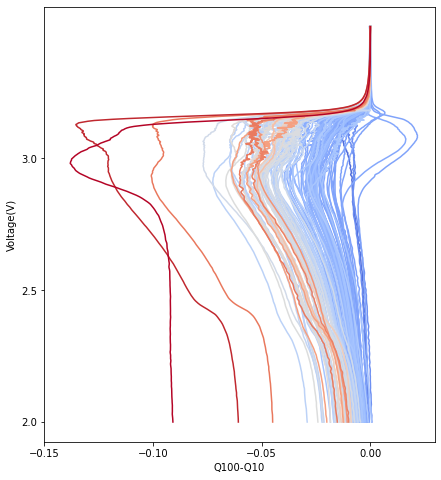

In [4]:
# 6, 20, 22 ,93 제외
plt.figure(figsize=(7,8))
for i,j in enumerate(sort[::-1,1,]):
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=Qdlin100-Qdlin10
    if np.any(diff>0.003):
        print(i)
    plt.plot(diff,np.linspace(3.5,2.0,1000),color=chargecolor[i])
    plt.xlabel('Q100-Q10')
    plt.ylabel('Voltage(V)')
    plt.xticks(np.arange(-0.15, 0.05, 0.05))
    plt.yticks(np.arange(2.0,3.5,0.5))
plt.show()

In [1]:
# 6, 7,9,22 ,123 제외
plt.figure(figsize=(7,8))
for i,j in enumerate(sort[::-1,1,]):
    if i==6:
        continue
    if i==7:
        continue
    if i==9:
        continue
    if i==22:
        continue
    if i==123:
        break
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=Qdlin100-Qdlin10
    plt.plot(diff,np.linspace(3.5,2.0,1000),color=chargecolor[i])
    plt.xlabel('Q100-Q10')
    plt.ylabel('Voltage(V)')
    plt.xticks(np.arange(-0.15, 0.05, 0.05))
    plt.yticks(np.arange(2.0,3.5,0.5))
plt.show()

NameError: name 'plt' is not defined

window_size 홀수만:101
polynomial order:5


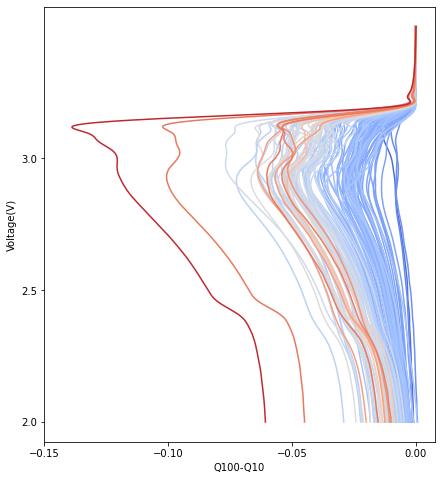

In [6]:
# 6, 20, 22 ,93 제외
i_w=int(input('window_size 홀수만:'))
i_p=int(input('polynomial order:'))
plt.figure(figsize=(7,8))
for i,j in enumerate(sort[::-1,1,]):
    if i==6:
        continue
    if i==7:
        continue
    if i==9:
        continue
    if i==22:
        continue
    if i==123:
        break
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=Qdlin100-Qdlin10
    hat = savgol_filter(diff, i_w, i_p)
    plt.plot(hat,np.linspace(3.5,2.0,1000),color=chargecolor[i])
    plt.xlabel('Q100-Q10')
    plt.ylabel('Voltage(V)')
    plt.xticks(np.arange(-0.15, 0.05, 0.05))
    plt.yticks(np.arange(2.0,3.5,0.5))
plt.show()

b3c42
b3c16
b3c17
b3c43
b2c1


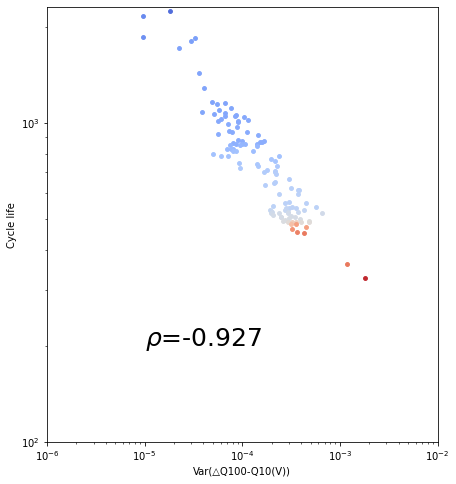

In [7]:
# 6, 20, 22 ,93 ,123 제외
plt.figure(figsize=(7,8))
Cycle=[]
VAR=[]
for i,j in enumerate(sort[::-1,1,]):
    if i==6:
        print(j)
        continue
    if i==7:
        print(j)
        continue
    if i==9:
        print(j)
        continue
    if i==22:
        print(j)
        continue
    if i==123:
        print(j)
        break
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=Qdlin100-Qdlin10
    var,cycle=np.var(diff),len(bat_dict[j]['summary']['cycle'])+1
    VAR.append(var)
    Cycle.append(cycle)
    plt.scatter(var,cycle,s=15,color=chargecolor[i])
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Q100-Q10')
    plt.ylabel('Voltage(V)')
    plt.axis([10**(-6),10**(-2),100,2300])
    plt.xlabel('Var(△Q100-Q10(V))')
    plt.ylabel('Cycle life')
x_val=np.array(VAR)
y_val=np.array(Cycle)
X_val=np.log10(x_val)
Y_val=np.log10(y_val)
r = np.round(np.corrcoef(X_val, Y_val),3)
font={'size':25}
plt.text(10**(-5),200,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.show()

In [8]:
print(batch1.keys())

dict_keys(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c9', 'b1c11', 'b1c14', 'b1c15', 'b1c16', 'b1c17', 'b1c18', 'b1c19', 'b1c20', 'b1c21', 'b1c23', 'b1c24', 'b1c25', 'b1c26', 'b1c27', 'b1c28', 'b1c29', 'b1c30', 'b1c31', 'b1c32', 'b1c33', 'b1c34', 'b1c35', 'b1c36', 'b1c37', 'b1c38', 'b1c39', 'b1c40', 'b1c41', 'b1c42', 'b1c43', 'b1c44', 'b1c45'])


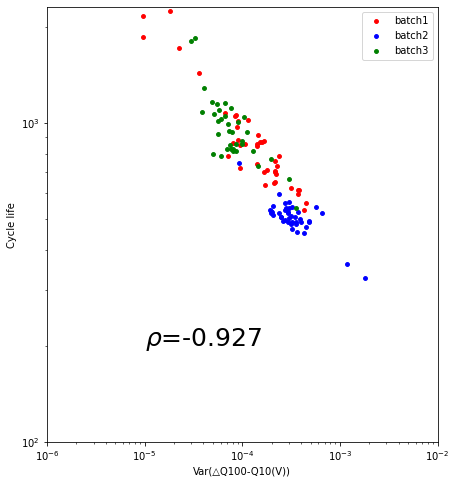

In [14]:
# 6, 20, 22 ,93 ,123 제외
plt.figure(figsize=(7,8))
Cycle1=[]
VAR1=[]
Cycle2=[]
VAR2=[]
Cycle3=[]
VAR3=[]
for i,j in enumerate(batch1.keys()):
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=Qdlin100-Qdlin10
    var,cycle=np.var(diff),len(bat_dict[j]['summary']['cycle'])+1
    VAR1.append(var)
    Cycle1.append(cycle)
plt.scatter(VAR1,Cycle1,s=15,color='red',label='batch1')
for i,j in enumerate(batch2.keys()):
    if j=='b2c1':
        continue
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=Qdlin100-Qdlin10
    var,cycle=np.var(diff),len(bat_dict[j]['summary']['cycle'])+1
    VAR2.append(var)
    Cycle2.append(cycle)
plt.scatter(VAR2,Cycle2,s=15,color='blue',label='batch2')
for i,j in enumerate(batch3.keys()):
    if j=='b3c16':
        continue
    if j=='b3c17':
        continue
    if j=='b3c42':
        continue
    if j=='b3c43':
        continue
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=Qdlin100-Qdlin10
    var,cycle=np.var(diff),len(bat_dict[j]['summary']['cycle'])+1
    VAR3.append(var)
    Cycle3.append(cycle)
plt.scatter(VAR3,Cycle3,s=15,color='green',label='batch3')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Q100-Q10')
plt.ylabel('Voltage(V)')
plt.axis([10**(-6),10**(-2),100,2300])
plt.xlabel('Var(△Q100-Q10(V))')
plt.ylabel('Cycle life')
x_val=np.array(VAR)
y_val=np.array(Cycle)
X_val=np.log10(x_val)
Y_val=np.log10(y_val)
r = np.round(np.corrcoef(X_val, Y_val),3)
font={'size':25}
plt.text(10**(-5),200,r'$\rho$''={}'.format(r[0, 1]),fontdict=font)
plt.legend()
plt.show()

[-5.01486104 -5.01395962 -4.73699974 -4.44261336 -4.64774366 -4.17887796
 -3.7688779  -3.81348608 -4.05938368 -4.14689653 -4.04606984 -4.0179491
 -4.09941368 -3.97015945 -3.65008055 -3.61990683 -3.36723741 -3.35033805
 -4.04079364 -3.93866252 -4.02788882 -3.79522    -3.8537032  -3.84471181
 -3.8382817  -3.74469922 -3.77773262 -3.6464635  -3.6670576  -3.84861616
 -3.77260582 -3.66950134 -3.67393889 -3.43304817 -3.50453372 -4.05521271
 -4.07151397 -3.66585579 -3.66777907 -3.4207     -3.42529224] [3.26740642 3.33425264 3.3494718  3.15624619 3.23248787 3.03059972
 2.80277373 2.93901978 3.02242837 2.89597473 2.94398888 2.85612444
 2.93500315 2.93247376 2.83884909 2.89597473 2.72672721 2.7466342
 3.00560945 3.00689371 2.93094903 2.93901978 2.924796   2.93399316
 2.96189547 2.85003326 2.94200805 2.86332286 2.8785218  2.86981821
 2.84633711 2.84695533 2.81090428 2.78958071 2.79518459 2.98452731
 3.0211893  2.84571802 2.81291336 2.78887512 2.77670118]


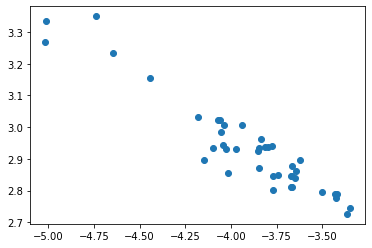

In [234]:
from sklearn.linear_model import ElasticNetCV
regr=ElasticNetCV(cv=4)
Cycle=[]
VAR=[]
for i,j in enumerate(batch1.keys()):
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=Qdlin100-Qdlin10
    var,cycle=np.var(diff),len(bat_dict[j]['summary']['cycle'])+1
    VAR.append(var)
    Cycle.append(cycle)
x_val=np.array(VAR)
y_val=np.array(Cycle)
X_val=np.log10(x_val)
Y_val=np.log10(y_val)
print(X_val,Y_val)
plt.scatter(X_val,Y_val)

In [235]:
X=X_val.reshape(-1,1)
X.shape, Y_val.shape

((41, 1), (41,))

In [236]:
regr.fit(X,Y_val)

ElasticNetCV(cv=4)

In [237]:
regr.alpha_
#논문에서는 Monte Carlo sampling 을 사용해서 이 값과 다를 수 있다.

0.00010982595710154384

In [238]:
regr.coef_

array([-0.35356249])

In [239]:
regr.intercept_

1.5523409949904876

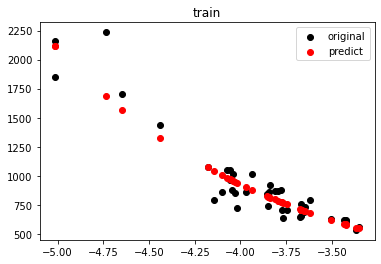

In [259]:
y_pred1=regr.predict(X)
plt.scatter(X,10**Y_val,color='black',label='original')
plt.scatter(X,10**y_pred1,color='red',label='predict')
plt.title('train')
plt.legend()

In [255]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rmse1=np.sqrt(mean_squared_error(10**Y_val,10**y_pred1))
print('train Mean Percent Error, RMSE')
mean_absolute_error(Y_val,y_pred1)*100,rmse1

train Mean Percent Error, RMSE


(3.743658052294748, 128.94633434962236)

In [240]:
Cycle2=[]
VAR2=[]
for i,j in enumerate(batch2.keys()):
    if j=='b2c1':
        continue
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=Qdlin100-Qdlin10
    var,cycle=np.var(diff),len(bat_dict[j]['summary']['cycle'])+1
    VAR2.append(var)
    Cycle2.append(cycle)
x_val2=np.array(VAR2)
y_val2=np.array(Cycle2)
X_val2=np.log10(x_val2)
Y_val2=np.log10(y_val2)

In [241]:
X2=X_val2.reshape(-1,1)

X2.shape, Y_val2.shape

((42, 1), (42,))

In [242]:
y_pred=regr.predict(X2)

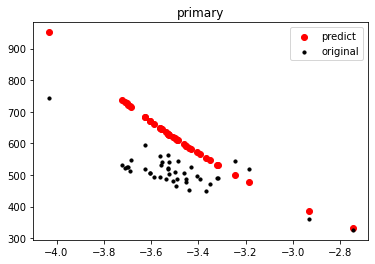

In [260]:
plt.scatter(X2,10**y_pred,color='r',label='predict')
plt.scatter(X_val2,10**Y_val2,color='black',s=10,label='original')
plt.title('primary')
plt.legend()

In [266]:
#  이게 이 값에 대한 rmse 값이 아닌가본데;; 그림 3에 있는 그래프에 대한 rmse 로 보인다.
print('primary Mean Percent Error, RMSE')
rmse=np.sqrt(mean_squared_error(10**Y_val2,10**y_pred))
mean_absolute_error(Y_val2,y_pred)*100,rmse

primary Mean Percent Error, RMSE


(8.720354637829814, 128.11613249588518)

In [261]:
Cycle3=[]
VAR3=[]
for i,j in enumerate(batch3.keys()):
    if j=='b3c42':
        continue
    if j=='b3c16':
        continue
    if j=='b3c17':
        continue
    if j=='b3c43':
        continue
    Qdlin10,Qdlin100=bat_dict[j]['cycles']['9']['Qdlin'],bat_dict[j]['cycles']['99']['Qdlin']
    diff=Qdlin100-Qdlin10
    var,cycle=np.var(diff),len(bat_dict[j]['summary']['cycle'])+1
    VAR3.append(var)
    Cycle3.append(cycle)
x_val3=np.array(VAR3)
y_val3=np.array(Cycle3)
X_val3=np.log10(x_val3)
Y_val3=np.log10(y_val3)

In [262]:
X3=X_val3.reshape(-1,1)

X3.shape, Y_val3.shape

((36, 1), (36,))

In [263]:
y_pred3=regr.predict(X3)

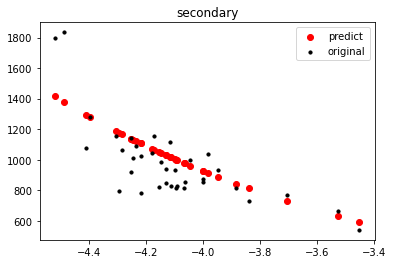

In [264]:
plt.scatter(X3,10**y_pred3,color='r',label='predict')
plt.scatter(X_val3,10**Y_val3,color='black',s=10,label='original')
plt.title('secondary')
plt.legend()

In [267]:
print('secondary Mean Percent Error, RMSE')
rmse3=np.sqrt(mean_squared_error(10**Y_val3,10**y_pred3))
mean_absolute_error(Y_val3,y_pred3)*100,rmse3

secondary Mean Percent Error, RMSE


(5.3862037362642265, 169.46673700564304)

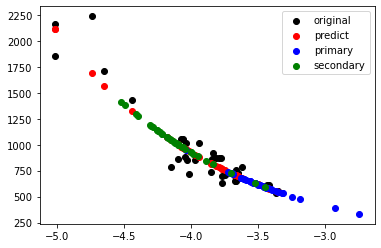

In [268]:
plt.scatter(X,10**Y_val,color='black',label='original')
plt.scatter(X,10**y_pred1,color='red',label='predict')
plt.scatter(X2,10**y_pred,color='blue',label='primary')
plt.scatter(X3,10**y_pred3,color='green',label='secondary')
plt.legend()

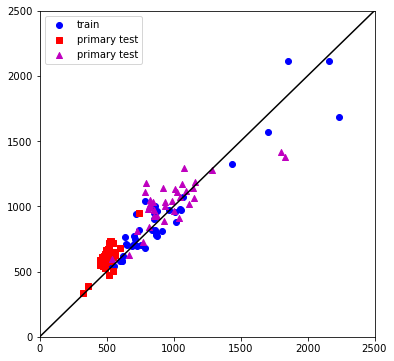

In [281]:
x=[0,2500];y=[0,2500]
plt.figure(figsize=(6,6))
plt.plot(x,y,c='black')
plt.scatter(10**Y_val,10**y_pred1,color='b',marker='o',label='train')
plt.scatter(10**Y_val2,10**y_pred,color='r',marker='s',label='primary test')
plt.scatter(10**Y_val3,10**y_pred3,color='m',marker='^',label='primary test')
plt.axis([0,2500,0,2500])
plt.legend()